## Liver Faliure (Hepatitis C) - Prediction. - Review 2

Hepatitis C

An infection caused by a virus that attacks the liver and leads to inflammation.

The virus is spread by contact with contaminated blood; for example, from sharing needles or from unsterile tattoo equipment.
Most people have no symptoms. Those who do develop symptoms may have fatigue, nausea, loss of appetite and yellowing of the eyes and skin

Data set url : http://archive.ics.uci.edu/ml/datasets/HCV+data

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis)

## Attribute Information:

14 attributes - Data set from UCI (UNIVERSITY OF CALIFORNIA)- Irwin Machine Learning Reository

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.

Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

X (Patient ID/No., 
Age - age (in years), 
Sex - male or female(f,m), 
ALB - Albumin, 
ALP - Alkaline phosphatase, 
ALT - Alanine transaminase, 
AST - Aspartate aminotransferase, 
BIL - Bilirubin, 
CHE - cholinesterase, 
CHOL - Cholesterol, 
CREA - Creatine, 
GGT - Gamma-glutamyl transferase, 
PROT - Protien in urine, 

## Part : 2

The data set has been preprocessed and saved as csv file for convinience. This processed data set can be found at below url.

Processed data set URL : https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv

### Visualisation using Power Bi and  Tableau

Power Bi : https://app.powerbi.com/groups/me/reports/a77111c3-b9cb-4d53-a7c4-72a64d21fbea/ReportSectionb6f4bcc3ec64ad39500a?bookmarkGuid=567c6dd7-d4be-43b5-b458-4e4238535ad4

Tableau Online : https://public.tableau.com/views/Liver-Faliure/Summary?:language=en&:display_count=y&:origin=viz_share_link

We can see that the distribution of ALP(Alkaline phosphatase) is different for people with fibrosis compared to rest of the population from the Tableau Dashboard. So lets inspect this behaviour.

### Hypothesis testing

In [1]:
import pandas as pd

# Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

In [2]:
fibrosis_and_alp = df[['Fibrosis','ALP']]
fibrosis_and_alp.head(5)

,Fibrosis,ALP
0,0,52.5
1,0,70.3
2,0,74.7
3,0,52.0
4,0,74.1


In [3]:
#ALP levels of patients with Fibrosis.
fibrosis = fibrosis_and_alp['ALP'] [fibrosis_and_alp['Fibrosis'] == True]
fibrosis.tail(5)

576    22.900000
577    66.935751
578    66.935751
579    66.935751
580    66.935751
Name: ALP, dtype: float64

In [4]:
#ALP levels of people without Fibrosis.
non_fibrosis = fibrosis_and_alp['ALP'] [fibrosis_and_alp['Fibrosis'] == False]
non_fibrosis.head()

0    52.5
1    70.3
2    74.7
3    52.0
4    74.1
Name: ALP, dtype: float64

Text(0, 0.5, 'ALP Levels')

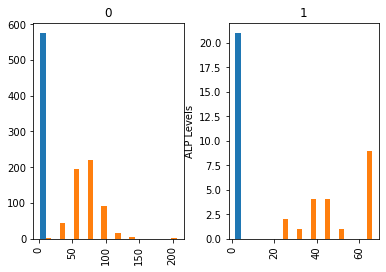

In [5]:
import matplotlib.pyplot as plt

# Distibution of ALP for people with and without Fibrosis.
fibrosis_and_alp.hist(by ='Fibrosis')
plt.ylabel('ALP Levels',fontsize=10)

ALP levels for people with fibrosis tend to be in between 20 and 60. The ALP levels of rest lies between 20 and 150.
This difference in ALP distribution could be due to chance. Lets find out. 

In [6]:
means_df = fibrosis_and_alp.groupby('Fibrosis').mean()
means_df

,ALP
Fibrosis,
0,67.542932
1,50.310560


In [7]:
observed_difference = means_df['ALP'][1] - means_df['ALP'][0]
observed_difference

-17.23237211298128

The observed value of the test statistic is -17.23 . Which favours Alternate Hypothesis.

#### ONE SIMULATION

In [8]:
fibrosis_and_alp = df[['Fibrosis', 'ALP']]
shuffled = fibrosis_and_alp.sample(596, replace = False)
shuffled_weights = shuffled['ALP']
original_and_shuffled = fibrosis_and_alp.assign(shuffled_weights = shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Fibrosis').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

4.953131528980116

#### PERMUTATION TEST

In [9]:
import numpy as np
import array

differences = np.zeros(5000)

for i in np.arange(5000):
    fibrosis_and_alp = df[['Fibrosis', 'ALP']]
    shuffled = fibrosis_and_alp.sample(596, replace = False)
    shuffled_weights = shuffled['ALP']
    original_and_shuffled = fibrosis_and_alp.assign(shuffled_weights = shuffled_weights.values )
    all_group_means = original_and_shuffled.groupby('Fibrosis').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [10]:
differences_df = pd.DataFrame(differences)
differences_df.head(5)

,0
0,4.795185
1,-0.708251
2,5.870836
3,-0.249220
4,-4.331142


Observed Difference: -17.23237211298128


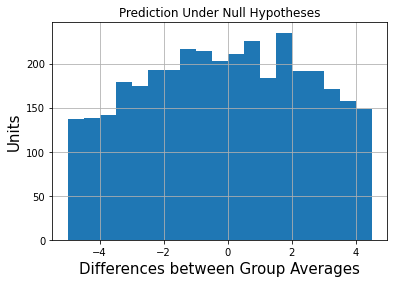

In [11]:
import matplotlib.pyplot as plt

differences_df.hist(bins = np.arange(-5, 5, 0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages', fontsize = 15)
plt.ylabel('Units', fontsize = 15);
print('Observed Difference:', observed_difference)

In [12]:
# Empirical P-Value
np.count_nonzero(differences <= observed_difference)/differences.size

0.0006

The empirical P-value is approximately  0, 
meaning that none of the 5,000 observed samples resulted in a difference of -17.23 units or lower. 
That is, the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

### Student T-test

In [13]:
ages = df['Age']
len(ages)

596

In [14]:
fib_ages = df['Age'][df['Fibrosis'] == 1]
len(fib_ages)

21

In [15]:
import numpy as np

fib_mean = np.mean(fib_ages)
age_mean = np.mean(ages)

print("Mean Age of (Fibrosis)Sample is :", fib_mean)
print("Mean Age of Population is :", age_mean)

Mean Age of (Fibrosis)Sample is : 52.333333333333336
Mean Age of Population is : 47.27348993288591


In [16]:
from scipy.stats import ttest_1samp

ttest, p_val = ttest_1samp(fib_ages, age_mean)
p_val

0.05618452968277598

p value is greater than 0.05(alpha), therefore Accepting Null hypotheses.

### Classification Models

#### 1. Naive Bayes - Classification (Model1 - Manual)

In [17]:
import pandas as pd

# Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, random_state=52)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (476, 12)
Shape of X_test: (120, 12)
Shape of Y_train: (476,)
Shape of Y_test: (120,)


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelnb1 = GaussianNB()
modelnb1.fit(X_train, Y_train)

Y_pred = modelnb1.predict(X_test)
Y_pred[:10]

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0], dtype=int64)

#### Accuracy

In [20]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

89.17

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       107
           1       0.75      1.00      0.86         3
           2       0.22      0.50      0.31         4
           3       0.50      0.60      0.55         5
           4       0.00      0.00      0.00         1

    accuracy                           0.89       120
   macro avg       0.49      0.61      0.53       120
weighted avg       0.92      0.89      0.90       120



C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

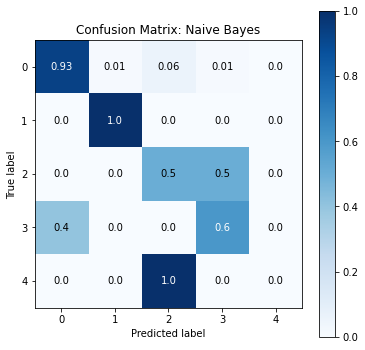

In [22]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                title='Confusion Matrix: Naive Bayes',
                                normalize=True,
                                cmap='Blues')

#### 10 Fold cross validation

In [23]:
from sklearn.model_selection import KFold
import numpy as np

scores = []
best_nb = GaussianNB()

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

cv = KFold(n_splits = 10,  shuffle = False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    
    best_nb.fit(X_train, Y_train)
    scores.append(best_nb.score(X_test, Y_test))

Train Index:  [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 

In [24]:
best_nb.fit(X_train, Y_train)
scores.append(best_nb.score(X_test, Y_test))
scores

[0.9333333333333333,
 0.8666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9661016949152542,
 0.864406779661017,
 0.0,
 0.0]

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_nb, X_test, Y_test, cv=10)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.16666667, 0.5       , 0.66666667, 0.66666667, 0.66666667,
       0.83333333, 0.66666667, 0.66666667, 0.66666667, 0.4       ])

Cross validation score is really less. The least populated class has less number of members than 10.

We have find some method to balance this class imbalance in the data set.

#### 1. Naive Bayes - Classification (Model2 - using SMOTE)

SMOTE - Synthetic Minority Oversampling Technique. 
This is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

In [27]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (2128, 12)
Shape of X_test: (532, 12)
Shape of Y_train: (2128,)
Shape of Y_test: (532,)


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelnb2 = GaussianNB()
modelnb2.fit(X_train, Y_train)

GaussianNB()

In [29]:
Y_pred = modelnb2.predict(X_test)
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

87.03

In [30]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       106
           1       0.99      0.82      0.90       106
           2       0.71      0.83      0.77       106
           3       0.82      0.79      0.81       107
           4       1.00      1.00      1.00       107

    accuracy                           0.87       532
   macro avg       0.88      0.87      0.87       532
weighted avg       0.88      0.87      0.87       532



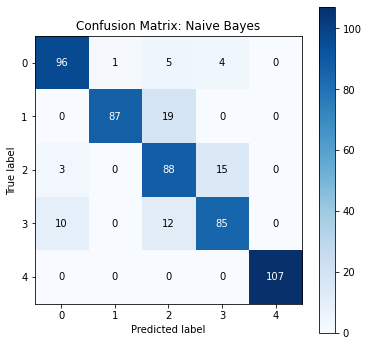

In [31]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                title='Confusion Matrix: Naive Bayes',
                                normalize=False,
                                cmap='Blues')

All True positive rates are aboce 75%.

#### 2. Decision Tree Classifier (Model1 - Manual)

In [32]:
from sklearn.tree import DecisionTreeClassifier

modeldt1 = DecisionTreeClassifier()
modeldt1.fit(X_train, Y_train)

DecisionTreeClassifier()

Y_pred = modeldt1.predict(X_test)

In [33]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

97.37

In [34]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.97      0.98      0.98       106
           2       0.95      0.97      0.96       106
           3       0.99      0.95      0.97       107
           4       1.00      0.99      1.00       107

    accuracy                           0.97       532
   macro avg       0.97      0.97      0.97       532
weighted avg       0.97      0.97      0.97       532



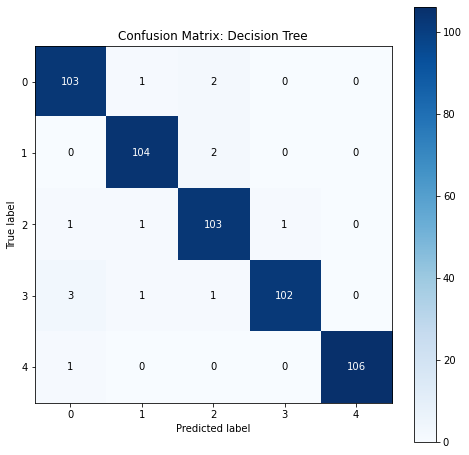

In [35]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=False,
                                    cmap='Blues')

plt.show()

#### 2. Decision Tree Classifier (Model2 - GridSearchCV)

In [36]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

min_samples_leaf = [0.10, 0.2, 0.3, 0.4, 0.5]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

dec_tree = tree.DecisionTreeClassifier()

In [37]:
parameters = dict(dec_tree__criterion=criterion,
                dec_tree__max_depth=max_depth,
                dec_tree__min_samples_leaf = min_samples_leaf,
                dec_tree__min_samples_split = min_samples_split)

In [38]:
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [39]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_smote, Y_smote)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dec_tree__min_samples_leaf': [0.1, 0.2, 0.3, 0.4,
                                                        0.5],
                         'dec_tree__min_samples_split': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9]})

In [40]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])


print('min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 6
min_samples_leaf: 0.1
min_samples_split: 0.1

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, min_samples_split=0.1)


In [41]:
from sklearn.tree import DecisionTreeClassifier

modeldt2 = DecisionTreeClassifier()
modeldt2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion="gini", 
                       max_depth=6, min_samples_leaf=0.1,
                       min_samples_split=0.1)

Y_pred = modeldt2.predict(X_test)

In [42]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

96.05

In [43]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.97      0.98      0.98       106
           2       0.94      0.98      0.96       106
           3       0.96      0.93      0.95       107
           4       0.99      0.98      0.99       107

    accuracy                           0.96       532
   macro avg       0.96      0.96      0.96       532
weighted avg       0.96      0.96      0.96       532



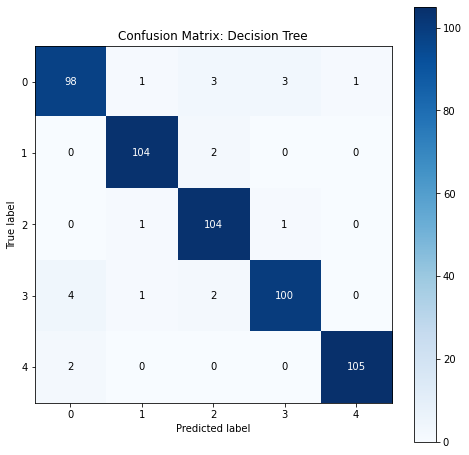

In [44]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=False,
                                    cmap='Blues')

plt.show()

All True positive rates are aboce 90%. This is a good model with 98% Accuracy. This model is better than the Naive Bayes model.

In [45]:
from sklearn import tree

text_rep = tree.export_text(modeldt2, feature_names=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])
print(text_rep)

|--- PROT <= 56.88
|   |--- ALP <= 41.90
|   |   |--- class: 0
|   |--- ALP >  41.90
|   |   |--- ALB <= 26.29
|   |   |   |--- class: 4
|   |   |--- ALB >  26.29
|   |   |   |--- CHE <= 5.23
|   |   |   |   |--- class: 0
|   |   |   |--- CHE >  5.23
|   |   |   |   |--- class: 4
|--- PROT >  56.88
|   |--- AST <= 31.38
|   |   |--- ALT <= 7.86
|   |   |   |--- ALP <= 36.33
|   |   |   |   |--- class: 3
|   |   |   |--- ALP >  36.33
|   |   |   |   |--- AST <= 26.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AST >  26.25
|   |   |   |   |   |--- class: 1
|   |   |--- ALT >  7.86
|   |   |   |--- ALP <= 28.10
|   |   |   |   |--- PROT <= 70.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PROT >  70.25
|   |   |   |   |   |--- class: 3
|   |   |   |--- ALP >  28.10
|   |   |   |   |--- class: 0
|   |--- AST >  31.38
|   |   |--- CHE <= 6.26
|   |   |   |--- ALT <= 121.75
|   |   |   |   |--- BIL <= 7.65
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BIL >  7

#### 3. KNN Classifier (Model1)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[:10]

array([1, 2, 0, 0, 0, 1, 2, 4, 2, 1], dtype=int64)

In [47]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

98.31

In [48]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       106
           1       0.97      0.98      0.98       106
           2       0.97      1.00      0.99       106
           3       0.97      1.00      0.99       107
           4       1.00      0.99      1.00       107

    accuracy                           0.98       532
   macro avg       0.98      0.98      0.98       532
weighted avg       0.98      0.98      0.98       532



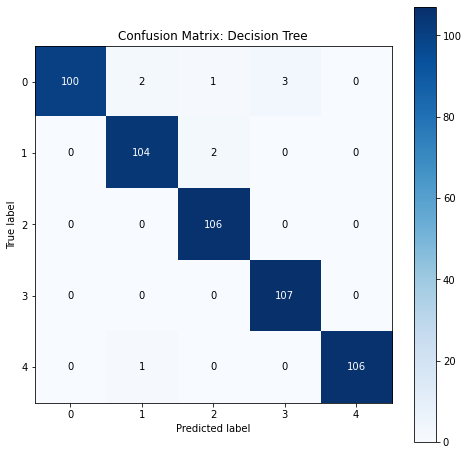

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=False,
                                    cmap='Blues')

#### 10 Fold Cross Validation - KNN

In [50]:
from sklearn.model_selection import KFold
import numpy as np

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

In [52]:
scores = []
best_knn = KNeighborsClassifier(n_neighbors=5)

cv = KFold(n_splits=10,  shuffle=False)
for train_index, test_index in cv.split(X_smote):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X_smote[train_index], X_smote[test_index], Y_smote[train_index], Y_smote[test_index]
    best_knn.fit(X_train, Y_train)
    scores.append(best_knn.score(X_test, Y_test))

Train Index:  [ 266  267  268 ... 2657 2658 2659] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

Train Index:  [   0    1    2 ... 2391 2392 2393] 

Test Index:  [2394 2395 2396 2397 2398 2399 2400 2401 2402 2403 2404 2405 2406 2407
 2408 2409 2410 2411 2412 2413 2414 2415 2416 2417 2418 2419 2420 2421
 2422 2423 2424 2425 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435
 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448 2449
 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463
 2464 2465 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477
 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490 2491
 2492 2493 2494 2495 2496 2497 2498 2499 2500 2501 2502 2503 2504 2505
 2506 2507 2508 2509 2510 2511 2512 2513 2514 2515 2516 2517 2518 2519
 2520 2521 2522 2523 2524 2525 2526 2527 2528 2529 2530 2531 2532 2533
 2534 2535 2536 2537 2538 2539 2540 2541 2542 2543 2544 2545 2546 2547
 2548 2549 2550 2551 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561
 2562 2563 2564 2565 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575
 2576 2577 2

In [53]:
best_knn.fit(X_train, Y_train)
scores.append(best_knn.score(X_test, Y_test))
scores

[0.6954887218045113,
 0.9060150375939849,
 0.9962406015037594,
 0.9699248120300752,
 0.9548872180451128,
 0.9661654135338346,
 0.9586466165413534,
 0.9774436090225563,
 0.9962406015037594,
 0.9661654135338346,
 0.9661654135338346]

In [54]:
print(np.mean(scores))

0.9412166780587833


Good cross validation score.

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_knn, X_smote, Y_smote, cv=10)

array([0.98496241, 0.93984962, 0.96616541, 0.97744361, 0.95864662,
       0.95112782, 0.9887218 , 0.9924812 , 0.98496241, 0.98496241])

#### 4. SVM (Model1-GridSearch)

In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

Apply Grid search to find the best parameters for SVC

In [57]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV 
  
# # defining parameter range 
# param_grid = {'C': [0.01, 0.1, 0.2, 0.5, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001], 
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# grid.fit(X_train, Y_train)

In [58]:
# # print best parameter after tuning 
# print(grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_)

Best SVC model using Grdi Search.

In [59]:
from sklearn.svm import SVC
 
svm_model = SVC(C=10, gamma=0.001, kernel='poly')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
acc

0.9887218045112782

In [61]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       106
           1       0.99      1.00      1.00       106
           2       0.97      0.99      0.98       106
           3       0.98      0.99      0.99       107
           4       1.00      1.00      1.00       107

    accuracy                           0.99       532
   macro avg       0.99      0.99      0.99       532
weighted avg       0.99      0.99      0.99       532



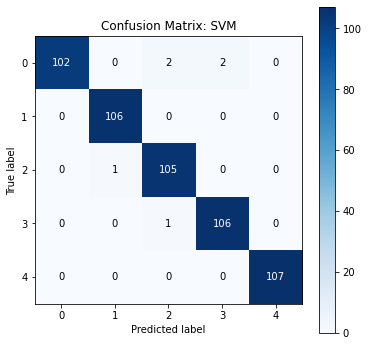

In [62]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=False,
                                    cmap='Blues')
plt.show()

#### 5. Logistic Regression(Model1)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,Y_pred)
acc

0.9360902255639098

In [65]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.96      0.97      0.97       106
           2       0.85      0.89      0.87       106
           3       0.94      0.86      0.90       107
           4       0.99      1.00      1.00       107

    accuracy                           0.94       532
   macro avg       0.94      0.94      0.94       532
weighted avg       0.94      0.94      0.94       532



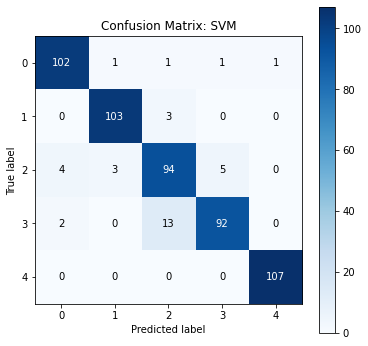

In [66]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=False,
                                    cmap='Blues')
plt.show()

### Regression Models

#### Linear Regression (Model1)

In [67]:
from sklearn.linear_model import LinearRegression

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['CREA']
X = df[['Age', 'Sex', 'category']]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [68]:
from sklearn.metrics import r2_score

Y_pred = linear.predict(X_test)
score = r2_score(Y_test, Y_pred)
score

0.27285523932471223

In [69]:
print("The linear model is: Y = ",linear.intercept_, "+", linear.coef_[0], "X1 + ", linear.coef_[1], "X2 + ", linear.coef_[2], "X3")

The linear model is: Y =  70.77934074280283 + -0.011260691654346058 X1 +  15.042858148318977 X2 +  -5.721602677490149 X3


In [70]:
# KFold cross validation
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(linear, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([0.33690404, 0.05109544, 0.35084828, 0.40717718, 0.18269247,
       0.27461192, 0.07991234, 0.23845648, 0.52623569, 0.2541711 ])

#### SVR (Model1) - Purely Experimental

In [71]:
from sklearn.model_selection import train_test_split

import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)


In [72]:
from sklearn.svm import SVR

sv_regressor = SVR(kernel='linear', degree=3)

sv_regressor.fit(X_train,Y_train)
Y_pred = sv_regressor.predict(X_test)
Y_pred[:10]

array([ 0.41658279,  3.58002043,  1.02303979, -0.12452727,  1.85799362,
        0.73452229,  2.55999092,  3.9372144 ,  0.86411768,  1.96392368])

In [73]:
# class to convert regression values to Class
def reg_to_class(val):
    cc = 0
    if val<=0.5:
        cc = 0
    elif val<=1.5 and val>0.5:
        cc = 1
    elif val<=2.5 and val>1.5:
        cc = 2
    elif val<=3.5 and val>2.5:
        cc = 3
    else:
        cc = 4
    return cc

In [74]:
pred = []

for i in Y_pred:
    pred.append(reg_to_class(i))

pred[:10]

[0, 4, 1, 0, 2, 1, 3, 4, 1, 2]

In [75]:
print(sv_regressor.score(X_test, Y_test))

0.5788191297335956


In [76]:
# create a KFold object with 10 splits
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(sv_regressor, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([0.53126952, 0.52044788, 0.48898534, 0.60643296, 0.53895043,
       0.54227488, 0.48473438, 0.57822591, 0.59667005, 0.58973746])

### ROC Tests

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [78]:
log_model = LogisticRegression()
nb_model = GaussianNB()
svc_model = SVC()
des_model = DecisionTreeClassifier(class_weight=None, criterion="gini", 
                       max_depth=6, min_samples_leaf=0.1,
                       min_samples_split=0.1)

In [79]:
# Multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

label_dict = {0: 'Blood donor',1 :'Cirrhosis', 2: 'Fibrosis', 3 :'Hepatits', 4 : 'Suspect Blood Donor'}

def find_roc(classifier):
    # fit model
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
        roc_auc  = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s ROC (area = %0.2f)' % (label_dict[i], roc_auc))

    plt.title(str(classifier) + ' Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

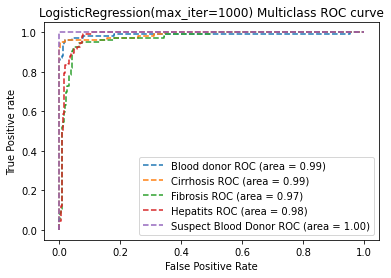

In [80]:
# Logistic Regression
log_model.max_iter=1000
find_roc(log_model)

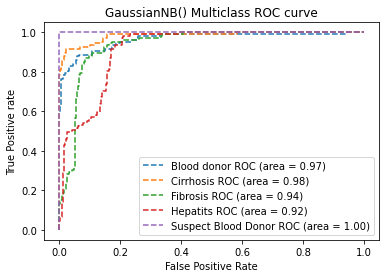

In [81]:
# Naive Bayes Model
find_roc(nb_model)

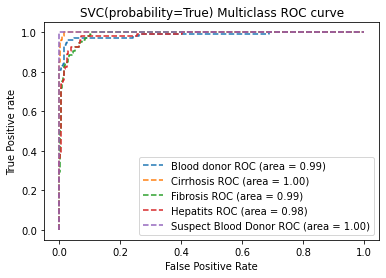

In [82]:
# SVC Model
svc_model = SVC()
svc_model.probability = True
find_roc(svc_model)

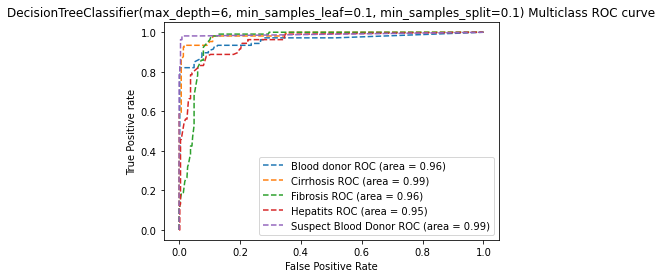

In [83]:
# Decision Tree
find_roc(des_model)

#### Gradio UI (User Interface)

In [84]:
# !pip install gradio

In [85]:
def convert(opt):
    if opt==0:
        strr = "Blood Donor"
    elif opt == 1:
        strr= "Cirrhosis"
    elif opt == 2:
        strr = "Fibrosis"
    elif opt == 3:
        strr = "Hepatitis"
    else:
        strr = "Suspected Blood Donor"
    return strr

In [86]:
import gradio as gr

import pandas as pd

def gpredict(Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT):
    
    if Sex == "Male":
        Sex = 1
    else:
        Sex = 0
        
    test = [[Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]]
    test = pd.DataFrame(test, columns =['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'], dtype = float)

    opt1 = int(svm_model.predict(test))
    opt2 = int(classifier.predict(test))
    opt3 = int(modelnb2.predict(test))
    opt4 = int(modeldt2.predict(test))
    opt5 = int(log_reg.predict(test))
    
    listt = [opt1, opt2, opt3, opt4, opt5]
    
    opt = max(set(listt), key=listt.count)
 
    return convert(opt1), convert(opt2), convert(opt3), convert(opt4), convert(opt5), convert(opt)


In [87]:
iface = gr.Interface(
  fn = gpredict, 
    
  inputs=[gr.inputs.Slider(0, 80, default=42), gr.inputs.Radio(['female', 'male'], label="Sex"), 
          gr.inputs.Slider(0, 70), gr.inputs.Slider(0, 210),
          gr.inputs.Slider(0, 330), gr.inputs.Slider(0, 190),
          gr.inputs.Slider(0, 100), gr.inputs.Slider(0, 18),
          gr.inputs.Slider(0, 10), gr.inputs.Slider(0, 160),
          gr.inputs.Slider(0, 300), gr.inputs.Slider(0, 90)],
    
  outputs=[gr.outputs.Textbox(label="SVM (98%)"), 
           gr.outputs.Textbox(label="KNN (97%)"), 
           gr.outputs.Textbox(label="Naive Bayes (87%)"), 
           gr.outputs.Textbox(label="Decision Tree (96%)"),
           gr.outputs.Textbox(label="Logistic Regression (94%)"),
           gr.outputs.Textbox(label="Final Result")]

  )

iface.launch()

Running locally at: http://127.0.0.1:7863/
To get a public link for a hosted model, set Share=True
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7863/', None)

#### GitHub Repo for this Document (19AI611_CaseStudy_Athul_016_Review2.ipynb) : 